In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COVID clinical trials.csv',index_col=0)
df.head()

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
Rank,,,,,,,,,,,,,,,,,,,,,
1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [3]:
df.shape

(5783, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5783 entries, 1 to 5783
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NCT Number               5783 non-null   object 
 1   Title                    5783 non-null   object 
 2   Acronym                  2480 non-null   object 
 3   Status                   5783 non-null   object 
 4   Study Results            5783 non-null   object 
 5   Conditions               5783 non-null   object 
 6   Interventions            4897 non-null   object 
 7   Outcome Measures         5748 non-null   object 
 8   Sponsor/Collaborators    5783 non-null   object 
 9   Gender                   5773 non-null   object 
 10  Age                      5783 non-null   object 
 11  Phases                   3322 non-null   object 
 12  Enrollment               5749 non-null   float64
 13  Funded Bys               5783 non-null   object 
 14  Study Type               5783

In [5]:
df.iloc[10]

NCT Number                                                       NCT04355897
Title                      CoVID-19 Plasma in Treatment of COVID-19 Patients
Acronym                                                                  NaN
Status                                                            Recruiting
Study Results                                           No Results Available
Conditions                                                          COVID 19
Interventions                       Biological: Convalescent COVID 19 Plasma
Outcome Measures           Reduce mortality|Reduce requirement for mechan...
Sponsor/Collaborators                                    The Christ Hospital
Gender                                                                   All
Age                              18 Years to 80 Years   (Adult, Older Adult)
Phases                                                         Early Phase 1
Enrollment                                                             100.0

In [6]:
df.isnull().sum()

NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64

In [7]:
df = df.drop(columns=['Acronym','Study Documents','Results First Posted'])

In [10]:
df['Phases'].fillna('Not Applicable', inplace=True)
df['Interventions'].fillna('Not Specified', inplace=True)
df.dropna(subset=['Outcome Measures', 'Enrollment', 'Start Date','Locations','Gender','Other IDs','Study Designs','Primary Completion Date','Completion Date'], inplace=True)


In [11]:
df.isnull().sum()

NCT Number                 0
Title                      0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
URL                        0
dtype: int64

In [12]:
df['Start Date'] = pd.to_datetime(df['Start Date'],errors = 'coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'],errors = 'coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'],errors = 'coerce')
df['First Posted'] = pd.to_datetime(df['First Posted'],errors = 'coerce')
df['Last Update Posted'] = pd.to_datetime(df['Last Update Posted'],errors = 'coerce')

In [13]:
df.dtypes

NCT Number                         object
Title                              object
Status                             object
Study Results                      object
Conditions                         object
Interventions                      object
Outcome Measures                   object
Sponsor/Collaborators              object
Gender                             object
Age                                object
Phases                             object
Enrollment                        float64
Funded Bys                         object
Study Type                         object
Study Designs                      object
Other IDs                          object
Start Date                 datetime64[ns]
Primary Completion Date    datetime64[ns]
Completion Date            datetime64[ns]
First Posted               datetime64[ns]
Last Update Posted         datetime64[ns]
Locations                          object
URL                                object
dtype: object

In [14]:
df.isnull().sum()

NCT Number                    0
Title                         0
Status                        0
Study Results                 0
Conditions                    0
Interventions                 0
Outcome Measures              0
Sponsor/Collaborators         0
Gender                        0
Age                           0
Phases                        0
Enrollment                    0
Funded Bys                    0
Study Type                    0
Study Designs                 0
Other IDs                     0
Start Date                  278
Primary Completion Date    1212
Completion Date            1276
First Posted                  0
Last Update Posted            0
Locations                     0
URL                           0
dtype: int64

In [15]:
df = df.dropna(subset=['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted'])

In [16]:
df.shape

(3859, 23)

In [17]:
df.isnull().sum()

NCT Number                 0
Title                      0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
URL                        0
dtype: int64

In [41]:
df['Start Year']=df['Start Date'].dt.year

Rank
1       2020
2       2020
3       2020
4       2020
6       2020
        ... 
5770    2021
5772    2020
5775    2020
5777    2020
5782    2021
Name: Start Year, Length: 3859, dtype: int32

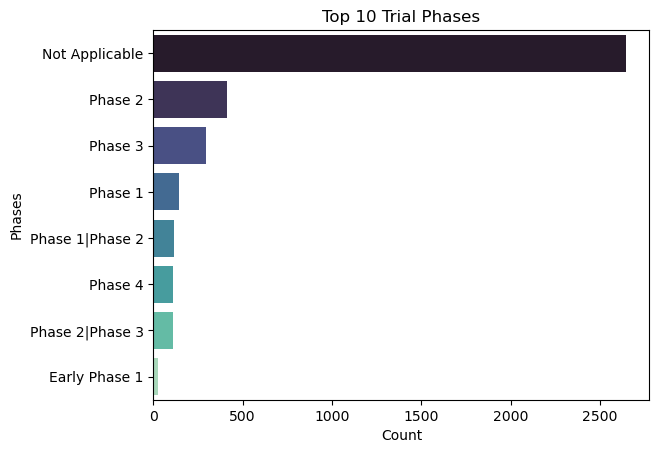

In [26]:
phase_counts=df['Phases'].value_counts().head(10)

sns.barplot(x=phase_counts.values, y=phase_counts.index,palette="mako")
plt.title('Top 10 Trial Phases')
plt.xlabel('Count')
plt.ylabel('Phases')
plt.show()

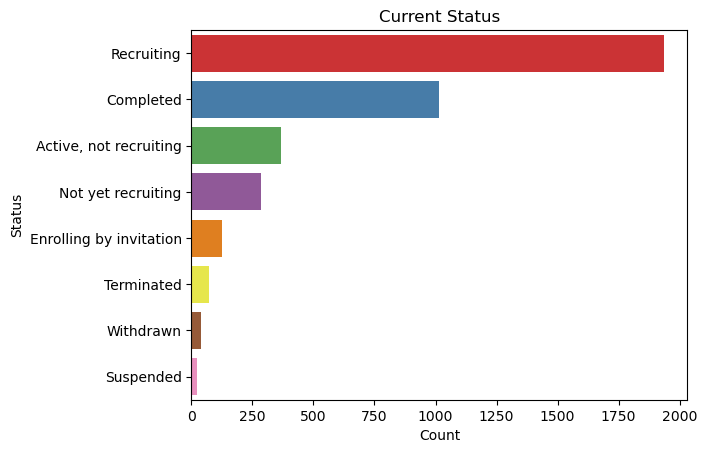

In [34]:
status_counts=df['Status'].value_counts()

sns.barplot(x=status_counts.values, y=status_counts.index,palette="Set1")
plt.title('Current Status')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()


C:\Users\gaura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gaura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


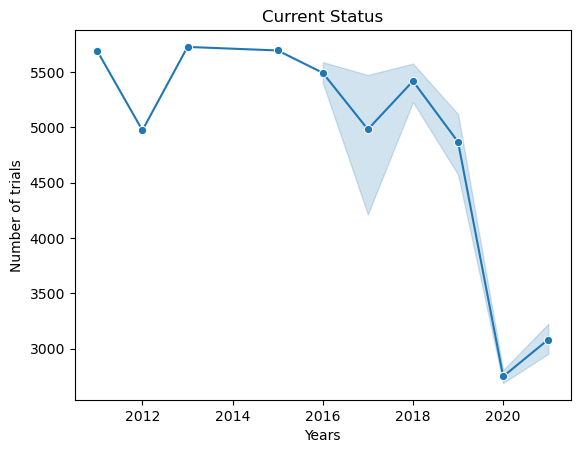

In [49]:
start_year_counts = df['Start Year'].sort_index()

sns.lineplot(x=start_year_counts.values, y=start_year_counts.index,marker='o')
plt.title('Current Status')
plt.xlabel('Years')
plt.ylabel('Number of trials')
plt.show()


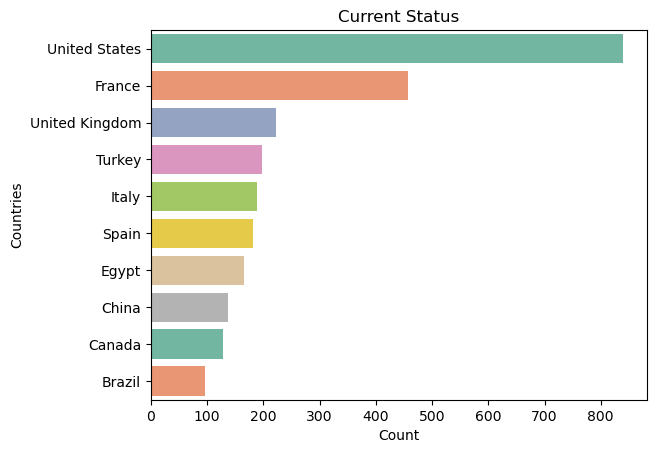

In [53]:
top_countries = df['Locations'].str.extract(r', ([^,]+)$')[0].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index,palette='Set2')
plt.title('Current Status')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.show()
